In [12]:
from Post_utils import *
from multi_exec import *
import dill

In [6]:
datapath = '/home/xiangli/projects/tmpdata/GCN/GraphSaint/'

working_dir = './res_dir/'
prepare_data_folder = working_dir + 'prepare_data/'
img_path = working_dir + 'result/'

core_par_sampler = 1
samples_per_processor = -(-200 // core_par_sampler) # round up division
eval_train_every = 5  # period to record the train loss

### ================ Start to do flexible settings according to different dataset: 
# read the total epoch number from the yml file to determine the mini_epoch_num and eval_train_every
data_name = 'Flickr'
train_config_yml = './table2/flickr2_e.yml'
multilabel_tag = False

# data_name = 'PPI_small'
# train_config_yml = './table2/ppi2_e.yml'


tune_param_name = 'mini_epoch_num'
tune_val_label_list = [1, 5] 
tune_val_list = [val for val in tune_val_label_list]

snapshot_period = 5   # period when to take a snapshot of the model for validation later

# refer to the yml file to decide the training period:
model_epoch_list = list(range(snapshot_period, 16, snapshot_period))    # snapshot epoch list for validation

trainer_list = list(range(3))

### prepare data

In [7]:
# =============== Step1 *** prepare for the batches, models, model_evaluation
train_params, train_phases, train_data, arch_gcn = train_setting(data_name, datapath, train_config_yml)
prepare(working_dir, train_data, train_params, arch_gcn)
train_phase_file_name = prepare_data_folder + 'model_train_phase'
with open(train_phase_file_name, "wb") as fp:
    dill.dump(train_phases, fp)

Loading training data..
Done loading training data..


### Training process

In [8]:
# ============== Step2 *** conduct the training process
train_input_file_name = prepare_data_folder + 'model_train_input'
with open(train_input_file_name, "rb") as fp:
    minibatch, model = dill.load(fp)


train_phase_file_name = prepare_data_folder + 'model_train_phase'
with open(train_phase_file_name, "rb") as fp:
    train_phases = dill.load(fp)

for tune_val_label, tune_val in zip(tune_val_label_list, tune_val_list):
    for trainer_id in trainer_list:
        execute_train_investigate(img_path, working_dir, train_phases, model, minibatch, eval_train_every, 
                                  tune_param_name, tune_val_label, tune_val, trainer_id = trainer_id,
                                  snapshot_every = snapshot_period, mini_epoch_num = 5, multilabel = multilabel_tag, 
                                  core_par_sampler = core_par_sampler, samples_per_processor = samples_per_processor)


START PHASE    0


/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/samplers.py:58: RuntimeWarning: divide by zero encountered in true_divide
  self.adj_train_norm = scipy.sparse.dia_matrix((1 / self.deg_train,0),shape=adj_train.shape).dot(adj_train)


sampling 200 subgraphs:   time = 0.522 sec
Epoch    1, Batch ID 0
Epoch    1, Batch ID 1
Epoch    1, Batch ID 2
Epoch    1, Batch ID 3
Epoch    2, Batch ID 0
Epoch    2, Batch ID 1
Epoch    2, Batch ID 2
Epoch    2, Batch ID 3
Epoch    3, Batch ID 0
Epoch    3, Batch ID 1
Epoch    3, Batch ID 2
Epoch    3, Batch ID 3
Epoch    4, Batch ID 0
Epoch    4, Batch ID 1
Epoch    4, Batch ID 2
Epoch    4, Batch ID 3
Epoch    5, Batch ID 0
Epoch    5, Batch ID 1
Epoch    5, Batch ID 2
Epoch    5, Batch ID 3
Epoch    6, Batch ID 0
Epoch    6, Batch ID 1
Epoch    6, Batch ID 2
Epoch    6, Batch ID 3
Epoch    7, Batch ID 0
Epoch    7, Batch ID 1
Epoch    7, Batch ID 2
Epoch    7, Batch ID 3
Epoch    8, Batch ID 0
Epoch    8, Batch ID 1
Epoch    8, Batch ID 2
Epoch    8, Batch ID 3
Epoch    9, Batch ID 0
Epoch    9, Batch ID 1
Epoch    9, Batch ID 2
Epoch    9, Batch ID 3
Epoch   10, Batch ID 0
Epoch   10, Batch ID 1
Epoch   10, Batch ID 2
Epoch   10, Batch ID 3
Epoch   11, Batch ID 0
Epoch   11, Ba

/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/samplers.py:58: RuntimeWarning: divide by zero encountered in true_divide
  self.adj_train_norm = scipy.sparse.dia_matrix((1 / self.deg_train,0),shape=adj_train.shape).dot(adj_train)


sampling 200 subgraphs:   time = 0.624 sec
Epoch    1, Batch ID 0
Epoch    1, Batch ID 1
Epoch    1, Batch ID 2
Epoch    1, Batch ID 3
Epoch    2, Batch ID 0
Epoch    2, Batch ID 1
Epoch    2, Batch ID 2
Epoch    2, Batch ID 3
Epoch    3, Batch ID 0
Epoch    3, Batch ID 1
Epoch    3, Batch ID 2
Epoch    3, Batch ID 3
Epoch    4, Batch ID 0
Epoch    4, Batch ID 1
Epoch    4, Batch ID 2
Epoch    4, Batch ID 3
Epoch    5, Batch ID 0
Epoch    5, Batch ID 1
Epoch    5, Batch ID 2
Epoch    5, Batch ID 3
Epoch    6, Batch ID 0
Epoch    6, Batch ID 1
Epoch    6, Batch ID 2
Epoch    6, Batch ID 3
Epoch    7, Batch ID 0
Epoch    7, Batch ID 1
Epoch    7, Batch ID 2
Epoch    7, Batch ID 3
Epoch    8, Batch ID 0
Epoch    8, Batch ID 1
Epoch    8, Batch ID 2
Epoch    8, Batch ID 3
Epoch    9, Batch ID 0
Epoch    9, Batch ID 1
Epoch    9, Batch ID 2
Epoch    9, Batch ID 3
Epoch   10, Batch ID 0
Epoch   10, Batch ID 1
Epoch   10, Batch ID 2
Epoch   10, Batch ID 3
Epoch   11, Batch ID 0
Epoch   11, Ba

/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/samplers.py:58: RuntimeWarning: divide by zero encountered in true_divide
  self.adj_train_norm = scipy.sparse.dia_matrix((1 / self.deg_train,0),shape=adj_train.shape).dot(adj_train)


sampling 200 subgraphs:   time = 0.502 sec
Epoch    1, Batch ID 0
Epoch    1, Batch ID 1
Epoch    1, Batch ID 2
Epoch    1, Batch ID 3
Epoch    2, Batch ID 0
Epoch    2, Batch ID 1
Epoch    2, Batch ID 2
Epoch    2, Batch ID 3
Epoch    3, Batch ID 0
Epoch    3, Batch ID 1
Epoch    3, Batch ID 2
Epoch    3, Batch ID 3
Epoch    4, Batch ID 0
Epoch    4, Batch ID 1
Epoch    4, Batch ID 2
Epoch    4, Batch ID 3
Epoch    5, Batch ID 0
Epoch    5, Batch ID 1
Epoch    5, Batch ID 2
Epoch    5, Batch ID 3
Epoch    6, Batch ID 0
Epoch    6, Batch ID 1
Epoch    6, Batch ID 2
Epoch    6, Batch ID 3
Epoch    7, Batch ID 0
Epoch    7, Batch ID 1
Epoch    7, Batch ID 2
Epoch    7, Batch ID 3
Epoch    8, Batch ID 0
Epoch    8, Batch ID 1
Epoch    8, Batch ID 2
Epoch    8, Batch ID 3
Epoch    9, Batch ID 0
Epoch    9, Batch ID 1
Epoch    9, Batch ID 2
Epoch    9, Batch ID 3
Epoch   10, Batch ID 0
Epoch   10, Batch ID 1
Epoch   10, Batch ID 2
Epoch   10, Batch ID 3
Epoch   11, Batch ID 0
Epoch   11, Ba

/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/samplers.py:58: RuntimeWarning: divide by zero encountered in true_divide
  self.adj_train_norm = scipy.sparse.dia_matrix((1 / self.deg_train,0),shape=adj_train.shape).dot(adj_train)


sampling 200 subgraphs:   time = 0.502 sec
Epoch    1, Batch ID 0
Epoch    2, Batch ID 0
Epoch    3, Batch ID 0
Epoch    4, Batch ID 0
Epoch    5, Batch ID 0
Epoch    1, Batch ID 1
Epoch    2, Batch ID 1
Epoch    3, Batch ID 1
Epoch    4, Batch ID 1
Epoch    5, Batch ID 1
Epoch    1, Batch ID 2
Epoch    2, Batch ID 2
Epoch    3, Batch ID 2
Epoch    4, Batch ID 2
Epoch    5, Batch ID 2
Epoch    1, Batch ID 3
Epoch    2, Batch ID 3
Epoch    3, Batch ID 3
Epoch    4, Batch ID 3
Epoch    5, Batch ID 3
Epoch    6, Batch ID 0
Epoch    7, Batch ID 0
Epoch    8, Batch ID 0
Epoch    9, Batch ID 0
Epoch   10, Batch ID 0
Epoch    6, Batch ID 1
Epoch    7, Batch ID 1
Epoch    8, Batch ID 1
Epoch    9, Batch ID 1
Epoch   10, Batch ID 1
Epoch    6, Batch ID 2
Epoch    7, Batch ID 2
Epoch    8, Batch ID 2
Epoch    9, Batch ID 2
Epoch   10, Batch ID 2
Epoch    6, Batch ID 3
Epoch    7, Batch ID 3
Epoch    8, Batch ID 3
Epoch    9, Batch ID 3
Epoch   10, Batch ID 3
Epoch   11, Batch ID 0
Epoch   12, Ba

/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/samplers.py:58: RuntimeWarning: divide by zero encountered in true_divide
  self.adj_train_norm = scipy.sparse.dia_matrix((1 / self.deg_train,0),shape=adj_train.shape).dot(adj_train)


sampling 200 subgraphs:   time = 0.519 sec
Epoch    1, Batch ID 0
Epoch    2, Batch ID 0
Epoch    3, Batch ID 0
Epoch    4, Batch ID 0
Epoch    5, Batch ID 0
Epoch    1, Batch ID 1
Epoch    2, Batch ID 1
Epoch    3, Batch ID 1
Epoch    4, Batch ID 1
Epoch    5, Batch ID 1
Epoch    1, Batch ID 2
Epoch    2, Batch ID 2
Epoch    3, Batch ID 2
Epoch    4, Batch ID 2
Epoch    5, Batch ID 2
Epoch    1, Batch ID 3
Epoch    2, Batch ID 3
Epoch    3, Batch ID 3
Epoch    4, Batch ID 3
Epoch    5, Batch ID 3
Epoch    6, Batch ID 0
Epoch    7, Batch ID 0
Epoch    8, Batch ID 0
Epoch    9, Batch ID 0
Epoch   10, Batch ID 0
Epoch    6, Batch ID 1
Epoch    7, Batch ID 1
Epoch    8, Batch ID 1
Epoch    9, Batch ID 1
Epoch   10, Batch ID 1
Epoch    6, Batch ID 2
Epoch    7, Batch ID 2
Epoch    8, Batch ID 2
Epoch    9, Batch ID 2
Epoch   10, Batch ID 2
Epoch    6, Batch ID 3
Epoch    7, Batch ID 3
Epoch    8, Batch ID 3
Epoch    9, Batch ID 3
Epoch   10, Batch ID 3
Epoch   11, Batch ID 0
Epoch   12, Ba

/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/samplers.py:58: RuntimeWarning: divide by zero encountered in true_divide
  self.adj_train_norm = scipy.sparse.dia_matrix((1 / self.deg_train,0),shape=adj_train.shape).dot(adj_train)


sampling 200 subgraphs:   time = 0.486 sec
Epoch    1, Batch ID 0
Epoch    2, Batch ID 0
Epoch    3, Batch ID 0
Epoch    4, Batch ID 0
Epoch    5, Batch ID 0
Epoch    1, Batch ID 1
Epoch    2, Batch ID 1
Epoch    3, Batch ID 1
Epoch    4, Batch ID 1
Epoch    5, Batch ID 1
Epoch    1, Batch ID 2
Epoch    2, Batch ID 2
Epoch    3, Batch ID 2
Epoch    4, Batch ID 2
Epoch    5, Batch ID 2
Epoch    1, Batch ID 3
Epoch    2, Batch ID 3
Epoch    3, Batch ID 3
Epoch    4, Batch ID 3
Epoch    5, Batch ID 3
Epoch    6, Batch ID 0
Epoch    7, Batch ID 0
Epoch    8, Batch ID 0
Epoch    9, Batch ID 0
Epoch   10, Batch ID 0
Epoch    6, Batch ID 1
Epoch    7, Batch ID 1
Epoch    8, Batch ID 1
Epoch    9, Batch ID 1
Epoch   10, Batch ID 1
Epoch    6, Batch ID 2
Epoch    7, Batch ID 2
Epoch    8, Batch ID 2
Epoch    9, Batch ID 2
Epoch   10, Batch ID 2
Epoch    6, Batch ID 3
Epoch    7, Batch ID 3
Epoch    8, Batch ID 3
Epoch    9, Batch ID 3
Epoch   10, Batch ID 3
Epoch   11, Batch ID 0
Epoch   12, Ba

### Investigate validation

In [10]:
# ================ Step3*** investigate validation:
evaluation_input_file_name = prepare_data_folder + 'model_eval_input'
with open(evaluation_input_file_name, "rb") as fp:
    minibatch_eval, model_eval = dill.load(fp)

for tune_val_label, tune_val in zip(tune_val_label_list, tune_val_list):
    for trainer_id in trainer_list:
        execute_validation_investigate(img_path, working_dir, minibatch_eval, model_eval, model_epoch_list, 
                                tune_param_name, tune_val_label, tune_val, trainer_id = trainer_id)



### Investigate test

In [11]:

# ================= Step4*** investigate test:
evaluation_input_file_name = prepare_data_folder + 'model_eval_input'
with open(evaluation_input_file_name, "rb") as fp:
    minibatch_eval, model_eval = dill.load(fp)

for tune_val_label, tune_val in zip(tune_val_label_list, tune_val_list):
    for trainer_id in trainer_list:
        execute_test_tuning(img_path, working_dir, minibatch_eval, model_eval, model_epoch_list, 
                                tune_param_name, tune_val_label, tune_val, trainer_id = trainer_id)

### Post processing

Start summarizing for dataset : Flickr
Start summarizing for dataset : Flickr


/home/xiangli/anaconda3/envs/pytorch_1_4_geometric/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/xiangli/anaconda3/envs/pytorch_1_4_geometric/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created t

Start summarizing for dataset : Flickr


/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/xiangli/anaconda3/envs/pytorch_1_4_geometric/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:76: RuntimeWarning: More than 20 figures have been opened. Fig

Start summarizing for dataset : Flickr


/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/xiangli/anaconda3/envs/pytorch_1_4_geometric/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:76: RuntimeWarning: More than 20 figures have been opened. Fig

Start summarizing for dataset : Flickr


/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/xiangli/anaconda3/envs/pytorch_1_4_geometric/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:76: RuntimeWarning: More than 20 figures have been opened. Fig

Start summarizing for dataset : Flickr


/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/xiangli/anaconda3/envs/pytorch_1_4_geometric/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:76: RuntimeWarning: More than 20 figures have been opened. Fig

Start running training for dataset: Flickr


/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:178: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/xiangli/anaconda3/envs/pytorch_1_4_geometric/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:178: RuntimeWarning: More than 20 figures have been opened. F

Start running training for dataset: Flickr


/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:178: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/xiangli/anaconda3/envs/pytorch_1_4_geometric/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:178: RuntimeWarning: More than 20 figures have been opened. F

Start running training for dataset: Flickr


/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:178: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/xiangli/anaconda3/envs/pytorch_1_4_geometric/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:178: RuntimeWarning: More than 20 figures have been opened. F

Start running training for dataset: Flickr


/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:178: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/xiangli/anaconda3/envs/pytorch_1_4_geometric/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:178: RuntimeWarning: More than 20 figures have been opened. F

Start running training for dataset: Flickr


/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:178: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/xiangli/anaconda3/envs/pytorch_1_4_geometric/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:178: RuntimeWarning: More than 20 figures have been opened. F

Start running training for dataset: Flickr


/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:178: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/xiangli/anaconda3/envs/pytorch_1_4_geometric/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/11_GraphSaint_hpc/gold_all_in_one/Post_utils.py:178: RuntimeWarning: More than 20 figures have been opened. F

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

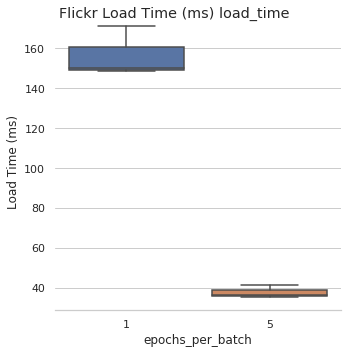

In [14]:
for tune_val_label, tune_val in zip(tune_val_label_list, tune_val_list):
    for trainer_id in trainer_list:
        step51_run_investigation_summarize_whole(data_name, img_path,
                                         tune_param_name, tune_val_label, tune_val,
                                            trainer_list, model_epoch_list)
    
for tune_val_label, tune_val in zip(tune_val_label_list, tune_val_list):
    for trainer_id in trainer_list:
        step50_run_tune_summarize_whole(data_name, img_path, 
                                    tune_param_name, tune_val_label_list, tune_val_list,
                                    trainer_list)